Task

First load the dataset in a notebook and preprocess it. Then use visualisations to address the following questions:

    Which states have the most sales?
    What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)
    Who is an outstanding customer in New York?
    Are there any differences among states in profitability?
    The Pareto Principle, also known as the 80/20 rule, is a concept derived from the work of Italian economist Vilfredo Pareto. It states that roughly 80% of the effects come from 20% of the causes. For instance, identifying the top 20% of products that generate 80% of sales or the top 20% of customers that contribute to 80% of profit can help in prioritizing efforts and resources. This focus can lead to improved efficiency and effectiveness in business strategies. Can we apply Pareto principle to customers and Profit ? (Determine if 20% of the customers contribute to 80% of the profit.)
    What are the Top 20 cities by Sales ? What about the Top 20 cities by Profit ? Are there any difference among cities in profitability ? (Identify the top 20 cities based on total sales and total profit and analyze differences in profitability among these cities.)
    What are the Top 20 customers by Sales?
    Plot the Cumulative curve in Sales by Customers. Can we apply Pareto principle to customers and Sales ?
    Based on the analysis, make decisions on which states and cities to prioritize for marketing strategies.


In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import ipywidgets as widgets
import skimpy as sk
#Pour voir toutes les colonnes
df = pd.read_excel(r'data_center\US_Superstore_data.xls')
pd.set_option('display.max_columns', None)
#df.info()
#df.describe()
#df.head()

sk.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 9994   │ │ string      │ 13    │                                                          │
│ │ Number of columns │ 21     │ │ int64       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 3     │                                                          │
│                                │ datetime64  │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column         ┃ NA  ┃ NA %   ┃ mean     ┃ sd       ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Row ID         │   0 │      0 │     4998 │     2885 │      1 │   2499 │   4998 │   7496 │   9994 │ ▇▇▇▇▇▇  │  │
│ │ Postal Code    │   0 │      0 │    55190 │    32060 │   1040 │  23220 │  56430 │  90010 │  99300 │ ▅▅▃▂▃▇  │  │
│ │ Sales          │   0 │      0 │    229.9 │    623.2 │  0.444 │  17.28 │  54.49 │  209.9 │  22640 │    ▇    │  │
│ │ Quantity       │   0 │      0 │     3.79 │    2.225 │      1 │      2 │      3 │      5 │     14 │  ▇▃▂▁   │  │
│ │ Discount       │   0 │      0 │   0.1562 │   0.2065 │      0 │      0 │    0.2 │    0.2 │    0.8 │ ▇▆   ▁  │  │
│ │ Profit         │   0 │      0 │    28.66 │    234.3 │  -6600 │  1.729 │  8.666 │  29.36 │   8400 │     ▇   │  │
│ └────────────────┴─────┴────────┴──────────┴──────────┴────────┴────────┴────────┴────────┴────────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column               ┃ NA     ┃ NA %      ┃ first                ┃ last                ┃ frequency         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩  │
│ │ Order Date           │      0 │         0 │      2014-01-03      │     2017-12-30      │ None              │  │
│ │ Ship Date            │      0 │         0 │      2014-01-07      │     2018-01-05      │ None              │  │
│ └──────────────────────┴────────┴───────────┴──────────────────────┴─────────────────────┴───────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Order ID  │  0 │    0 │ CA-2016-1 │ CA-2016-1 │ CA-2014-1 │ US-2017-1 │        14 │         1 │       9994 │  │
│ │           │    │      │ 52156     │ 52156     │ 0000

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Verification des données (tout va bien)

In [8]:
print(len(df))
year_data = df.drop_duplicates()
print(len(year_data))

# Pas de duplicats
#Verification des données si null
missing_data = year_data.isnull()
print(missing_data.sum())

9994
9994
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


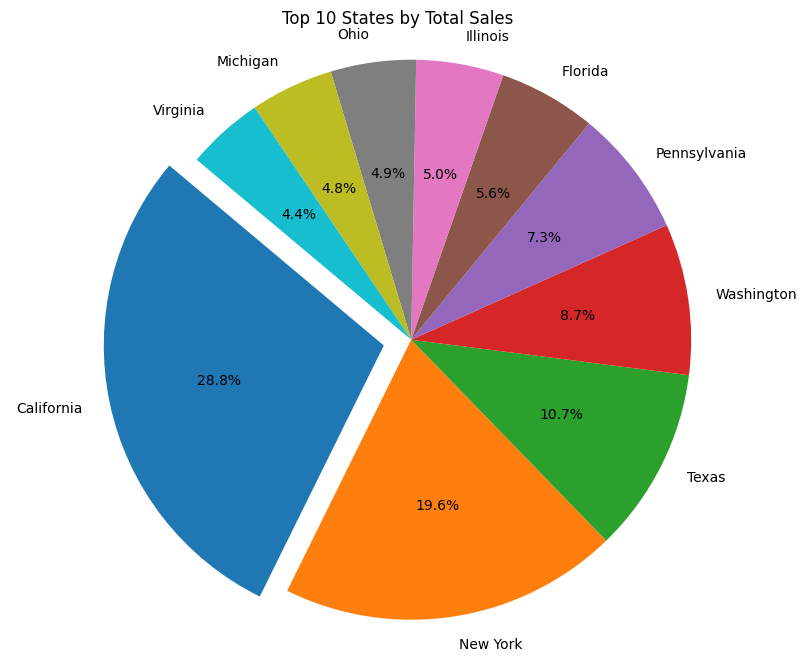

In [14]:
import matplotlib.pyplot as plt

# Agrégation des ventes par État
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

# Optionnel : ne garder que les N premiers États (ex: top 10)
top_states = state_sales.head(10)

# Préparation des paramètres du camembert
labels = top_states.index
sizes = top_states.values
explode = [0.1] + [0 for _ in range(len(labels) - 1)]  # mettre en avant le top 1

# Affichage du pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode
)
plt.title('Top 10 States by Total Sales')
plt.axis('equal')  # pour que le camembert soit circulaire
plt.show()


On observe bien que c'est la Californie qui est le plus gros vendeur au US

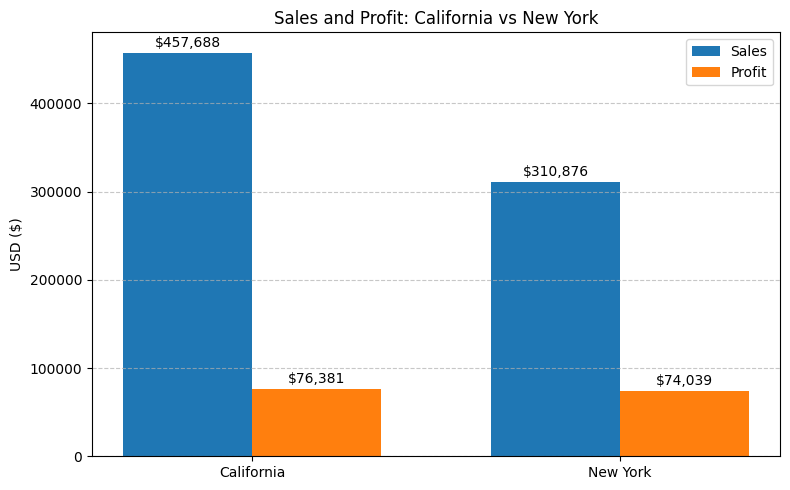

In [16]:
# Données préparées
states_to_compare = ['New York', 'California']
df_filtered = df[df['State'].isin(states_to_compare)]
summary = df_filtered.groupby('State')[['Sales', 'Profit']].sum()

labels = summary.index
sales = summary['Sales'].values
profit = summary['Profit'].values

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
bars1 = ax.bar(x - width/2, sales, width, label='Sales')
bars2 = ax.bar(x + width/2, profit, width, label='Profit')

# Ajout automatique des labels sur les barres
ax.bar_label(bars1, fmt='${:,.0f}', padding=2)
ax.bar_label(bars2, fmt='${:,.0f}', padding=2)

# Mise en forme
ax.set_ylabel('USD ($)')
ax.set_title('Sales and Profit: California vs New York')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Who is an outstanding customer in New York?

Je pars dans l'idée de trouver le client ayant fait le plus de d'achat dans New-York
C'est Peter Fuller

In [17]:
#643!!! Ok je ne vais pas faire de Treemap
list_customer_New_York = df[(df['State'] == 'New York') & (df['Segment'] == 'Consumer')]['Customer Name']
print(len(list_customer_New_York))

643


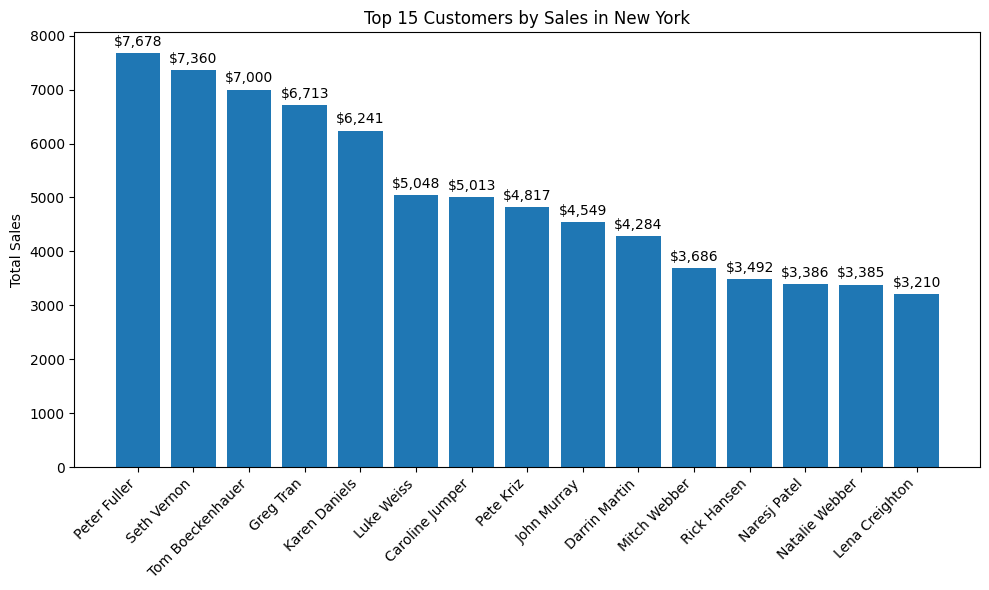

In [18]:
ny_customers_sales = df[(df['State'] == 'New York') & (df['Segment'] == 'Consumer')].groupby('Customer Name')['Sales'].sum()

# Trier et sélectionner top 10
top_customers = ny_customers_sales.sort_values(ascending=False).head(15)

# Plot avec création explicite de la figure et des axes
fig, ax = plt.subplots(figsize=(10,6))

bars = ax.bar(top_customers.index, top_customers.values)
ax.set_xticks(range(len(top_customers)))
ax.set_xticklabels(top_customers.index, rotation=45, ha='right')
ax.set_title("Top 15 Customers by Sales in New York")
ax.set_ylabel("Total Sales")

# Ajout des labels sur les barres
ax.bar_label(bars, fmt='${:,.0f}', padding=3)

plt.tight_layout()
plt.show()

Are there any differences among states in profitability?

On va prendre les 20 villes avec le nombre de ventes ('Sales') et les comparer avec le profit ('Profit')

In [29]:
# list_top_city_sale = df[df['Sales']].groupby('City').head(20)

# print(list_top_city_sale)

top_state_sales = df.groupby('State')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).head(20)
print(top_state_sales)

top_state_profit = df.groupby('State')[['Profit', 'Sales']].sum().sort_values(by='Profit', ascending=False).head(20)
print(top_state_profit)

                      Sales      Profit
State                                  
California      457687.6315  76381.3871
New York        310876.2710  74038.5486
Texas           170188.0458 -25729.3563
Washington      138641.2700  33402.6517
Pennsylvania    116511.9140 -15559.9603
Florida          89473.7080  -3399.3017
Illinois         80166.1010 -12607.8870
Ohio             78258.1360 -16971.3766
Michigan         76269.6140  24463.1876
Virginia         70636.7200  18597.9504
North Carolina   55603.1640  -7490.9122
Indiana          53555.3600  18382.9363
Georgia          49095.8400  16250.0433
Kentucky         36591.7500  11199.6966
New Jersey       35764.3120   9772.9138
Arizona          35282.0010  -3427.9246
Wisconsin        32114.6100   8401.8004
Colorado         32108.1180  -6527.8579
Tennessee        30661.8730  -5341.6936
Minnesota        29863.1500  10823.1874
                   Profit        Sales
State                                 
California     76381.3871  457687.6315
New

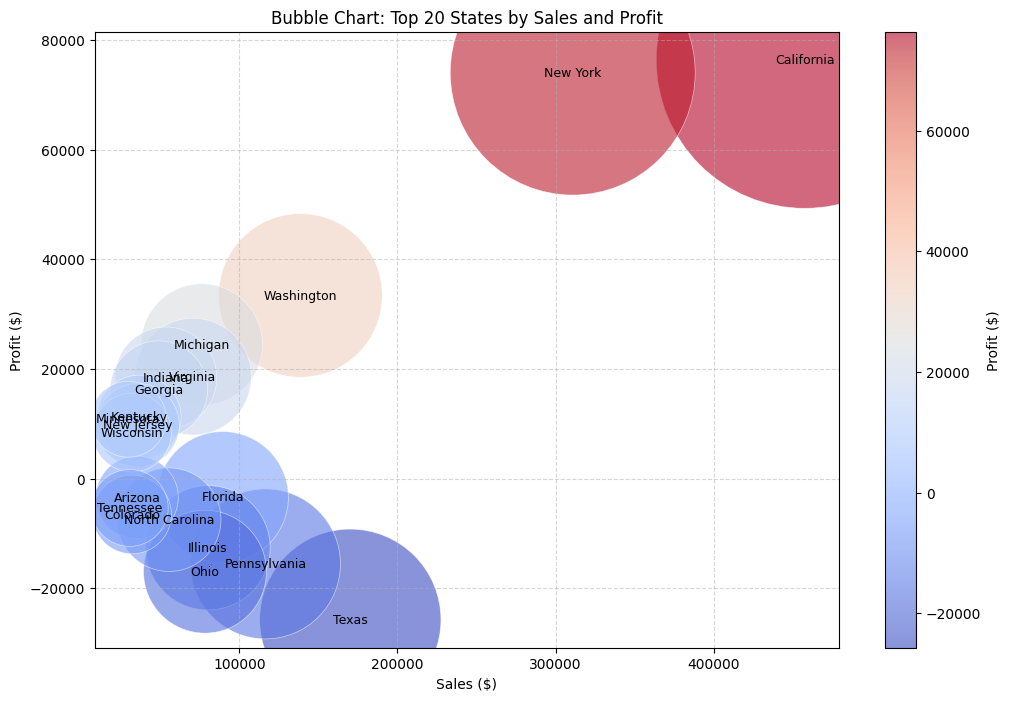

In [37]:
# Utiliser top_state_sales ou top_state_profit, ici on prend top_state_sales
summary = top_state_sales.reset_index()

x = summary['Sales']
y = summary['Profit']
sizes = summary['Sales'] / 10  # Ajuster la taille des bulles
colors = summary['Profit']

plt.figure(figsize=(12,8))
scatter = plt.scatter(x, y, s=sizes, c=colors, cmap='coolwarm', alpha=0.6, edgecolors='w', linewidth=0.5)

plt.colorbar(scatter, label='Profit ($)')
plt.xlabel('Sales ($)')
plt.ylabel('Profit ($)')
plt.title('Bubble Chart: Top 20 States by Sales and Profit')

# Annotation des états
for i, state in enumerate(summary['State']):
    plt.text(x[i], y[i], state, fontsize=9, ha='center', va='center')

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


On observe 2 géants mais beacoup d'états endettés (plus d'import que d'export?)

C:\Users\alexa\AppData\Local\Temp\ipykernel_17712\3596571251.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(top_city_sales.index, rotation=45, ha='right')
C:\Users\alexa\AppData\Local\Temp\ipykernel_17712\3596571251.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(top_city_profit.index, rotation=45, ha='right')


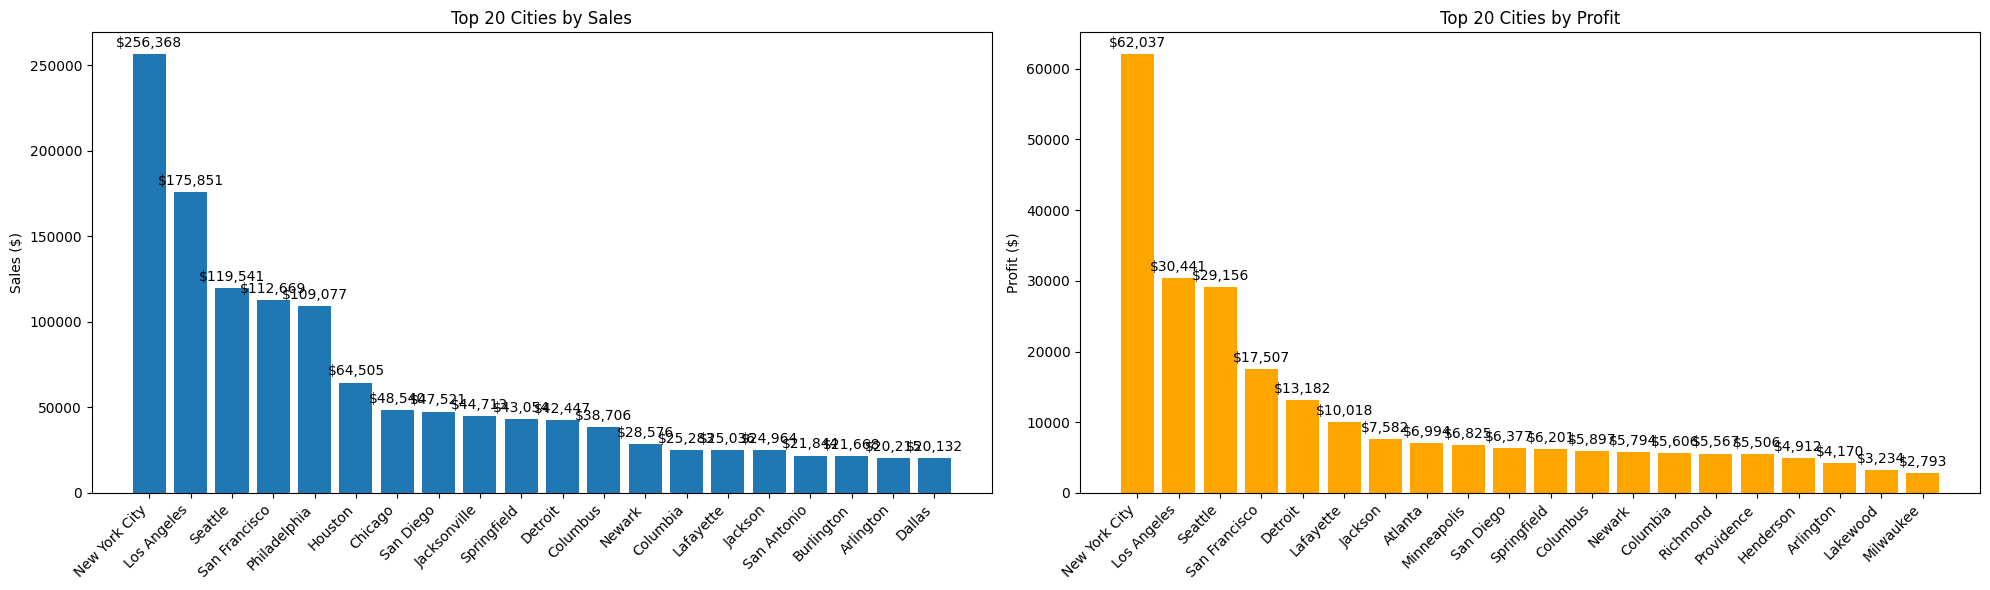

In [43]:
top_city_sales = df.groupby('City')[['Sales']].sum().sort_values(by='Sales', ascending=False).head(20)

top_city_profit = df.groupby('City')[['Profit']].sum().sort_values(by='Profit', ascending=False).head(20)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

# Plot ventes par ville
bars1 = axes[0].bar(top_city_sales.index, top_city_sales['Sales'])
axes[0].set_title('Top 20 Cities by Sales')
axes[0].set_ylabel('Sales ($)')
axes[0].set_xticklabels(top_city_sales.index, rotation=45, ha='right')
axes[0].bar_label(bars1, fmt='${:,.0f}', padding=3)  # Ajout des labels

# Plot profit par ville
bars2 = axes[1].bar(top_city_profit.index, top_city_profit['Profit'], color='orange')
axes[1].set_title('Top 20 Cities by Profit')
axes[1].set_ylabel('Profit ($)')
axes[1].set_xticklabels(top_city_profit.index, rotation=45, ha='right')
axes[1].bar_label(bars2, fmt='${:,.0f}', padding=3)  # Ajout des labels

plt.tight_layout()
plt.show()

On observe que les villes ne suivent pas spécialement une courbe 

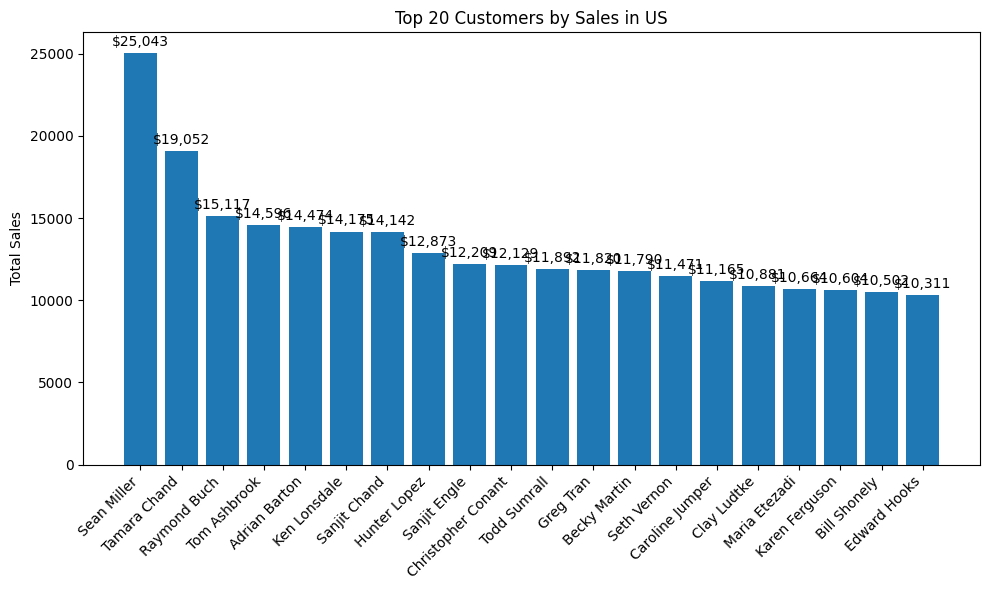

In [44]:
ny_customers_sales = df.groupby('Customer Name')['Sales'].sum()

# Trier et sélectionner top 10
top_customers = ny_customers_sales.sort_values(ascending=False).head(20)

# Plot avec création explicite de la figure et des axes
fig, ax = plt.subplots(figsize=(10,6))

bars = ax.bar(top_customers.index, top_customers.values)
ax.set_xticks(range(len(top_customers)))
ax.set_xticklabels(top_customers.index, rotation=45, ha='right')
ax.set_title("Top 20 Customers by Sales in US")
ax.set_ylabel("Total Sales")

# Ajout des labels sur les barres
ax.bar_label(bars, fmt='${:,.0f}', padding=3)

plt.tight_layout()
plt.show()

In [45]:
# Regrouper les ventes par client
customer_sales = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)

# Nombre total de clients
total_customers = len(customer_sales)

# Nombre de clients dans les 20%
top_20_count = int(0.2 * total_customers)

# Sélection des top 20% clients
top_20_customers = customer_sales.head(top_20_count)

# Sommes
top_20_sales_total = top_20_customers.sum()
total_sales = customer_sales.sum()

# Pourcentage des ventes faites par le top 20%
percentage = (top_20_sales_total / total_sales) * 100

# Affichage des résultats
print(f"Ventes des top 20% clients : ${top_20_sales_total:,.2f}")
print(f"Ventes totales tous clients : ${total_sales:,.2f}")
print(f"Le top 20% des clients représente {percentage:.2f}% des ventes.")


Ventes des top 20% clients : $1,101,781.39
Ventes totales tous clients : $2,297,200.86
Le top 20% des clients représente 47.96% des ventes.


Donc le principe de Pareto ne s'applique pas sur les clients en eux même

In [ ]:
# Regrouper les ventes par villes
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

# Nombre total des villes
total_city = len(city_sales)

# Nombre de ville dans les 20%
top_20_count = int(0.2 * total_city)

# Sélection des top 20% villes
top_20_city = city_sales.head(top_20_count)

# Sommes
top_20_sales_total = top_20_city.sum()
total_sales = city_sales.sum()

# Pourcentage des ventes faites par le top 20%
percentage = (top_20_sales_total / total_sales) * 100

# Affichage des résultats
print(f"Ventes des top 20% des villes : ${top_20_sales_total:,.2f}")
print(f"Ventes totales tous les villes : ${total_sales:,.2f}")
print(f"Le top 20% des villes représente {percentage:.2f}% des ventes.")

Ventes des top 20% des villes : $1,919,168.32
Ventes totales tous les villes : $2,297,200.86
Le top 20% des villes représente 83.54% des ventes.
